In [1]:
import netCDF4 as nc
from wrf import getvar, ALL_TIMES
import glob
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from sklearn.metrics import mean_squared_error
from scipy.optimize import curve_fit
from math import sqrt
import glob
from datetime import datetime
from matplotlib.cm import get_cmap
from netCDF4 import Dataset
import calendar
import datetime


In [2]:
"""
# out_dir ='/Users/eliotperrin/Desktop/Travail de bachelor/Around'

lwpCNT = []

simuCONTROL = '/Users/eliotperrin/Desktop/Travail de bachelor/Around/wrfout_Helmos_d03_CONTROL_LONGER_VL.nc'

CONTROL = Dataset(simuCONTROL)


### WRF constants
RA=287.15
RD=287.0
CP=1004.5
P1000MB=100000.0
EPS=0.622

#time = CONTROL.variables['Times']
wrf_time = np.arange(np.datetime64('2021-12-17T00:00'), np.datetime64('2021-12-19T00:01'),dtype='datetime64[m]')[::30]


presCNT = np.squeeze(CONTROL.variables['P'][:] + CONTROL.variables['PB'][:])
thetCNT = np.squeeze(CONTROL.variables['T'][:] + 300.0)
qvCNT = np.squeeze(CONTROL.variables['QVAPOR'][:])
tkCNT = ((presCNT / P1000MB)**(RD/CP) * thetCNT)
tvCNT = tkCNT * (EPS + qvCNT) / (EPS * (1. + qvCNT))
rhoCNT = presCNT/RA/tvCNT
lwcCNT = np.squeeze(CONTROL.variables['QCLOUD'][:] + CONTROL.variables['QRAIN'][:])*rhoCNT*10**3 #gm-3
zstagCNT = np.squeeze(getvar(CONTROL,"zstag",timeidx=ALL_TIMES))
zstagCNT = zstagCNT[:]
dzCNT = np.diff(zstagCNT,axis=1)

lwpCNT = np.nansum(lwcCNT*dzCNT,axis=1)

print(lwpCNT)
"""


'\n# out_dir =\'/Users/eliotperrin/Desktop/Travail de bachelor/Around\'\n\nlwpCNT = []\n\nsimuCONTROL = \'/Users/eliotperrin/Desktop/Travail de bachelor/Around/wrfout_Helmos_d03_CONTROL_LONGER_VL.nc\'\n\nCONTROL = Dataset(simuCONTROL)\n\n\n### WRF constants\nRA=287.15\nRD=287.0\nCP=1004.5\nP1000MB=100000.0\nEPS=0.622\n\n#time = CONTROL.variables[\'Times\']\nwrf_time = np.arange(np.datetime64(\'2021-12-17T00:00\'), np.datetime64(\'2021-12-19T00:01\'),dtype=\'datetime64[m]\')[::30]\n\n\npresCNT = np.squeeze(CONTROL.variables[\'P\'][:] + CONTROL.variables[\'PB\'][:])\nthetCNT = np.squeeze(CONTROL.variables[\'T\'][:] + 300.0)\nqvCNT = np.squeeze(CONTROL.variables[\'QVAPOR\'][:])\ntkCNT = ((presCNT / P1000MB)**(RD/CP) * thetCNT)\ntvCNT = tkCNT * (EPS + qvCNT) / (EPS * (1. + qvCNT))\nrhoCNT = presCNT/RA/tvCNT\nlwcCNT = np.squeeze(CONTROL.variables[\'QCLOUD\'][:] + CONTROL.variables[\'QRAIN\'][:])*rhoCNT*10**3 #gm-3\nzstagCNT = np.squeeze(getvar(CONTROL,"zstag",timeidx=ALL_TIMES))\nzstagCNT =

In [3]:
# Chemin des fichiers à extraire
simuFILES = ['/Users/eliotperrin/Desktop/Travail de bachelor/Around/wrfout_Helmos_d03_CONTROL_LONGER_VL.nc',
             '/Users/eliotperrin/Desktop/Travail de bachelor/Around/wrfout_Helmos_d03_CONTROL_LONGER_VL_1.nc',
             '/Users/eliotperrin/Desktop/Travail de bachelor/Around/wrfout_Helmos_d03_CONTROL_LONGER_VL_2.nc',
             '/Users/eliotperrin/Desktop/Travail de bachelor/Around/wrfout_Helmos_d03_CONTROL_LONGER_VL_3.nc',
             '/Users/eliotperrin/Desktop/Travail de bachelor/Around/wrfout_Helmos_d03_CONTROL_LONGER_VL_4.nc',
             '/Users/eliotperrin/Desktop/Travail de bachelor/Around/wrfout_Helmos_d03_CONTROL_LONGER_VL_5.nc',
             '/Users/eliotperrin/Desktop/Travail de bachelor/Around/wrfout_Helmos_d03_CONTROL_LONGER_VL_6.nc',
             '/Users/eliotperrin/Desktop/Travail de bachelor/Around/wrfout_Helmos_d03_CONTROL_LONGER_VL_7.nc',
             '/Users/eliotperrin/Desktop/Travail de bachelor/Around/wrfout_Helmos_d03_CONTROL_LONGER_VL_8.nc',]

# WRF constants
RA = 287.15
RD = 287.0
CP = 1004.5
P1000MB = 100000.0
EPS = 0.622


# Initialiser la liste
lwpCNT_list = []

# Boucle à travers les fichiers
for simuCONTROL in simuFILES:
    # Ouvrir le fichier
    CONTROL = Dataset(simuCONTROL)

    # Extraire les variables
    wrf_time = np.arange(np.datetime64('2021-12-17T00:00'), np.datetime64('2021-12-19T00:01'),dtype='datetime64[m]')[::30]

    spin_up = 41
    end = len(wrf_time)

    presCNT = np.squeeze(CONTROL.variables['P'][:] + CONTROL.variables['PB'][:])
    thetCNT = np.squeeze(CONTROL.variables['T'][:] + 300.0)
    qvCNT = np.squeeze(CONTROL.variables['QVAPOR'][:])
    tkCNT = ((presCNT / P1000MB)**(RD/CP) * thetCNT)
    tvCNT = tkCNT * (EPS + qvCNT) / (EPS * (1. + qvCNT))
    rhoCNT = presCNT/RA/tvCNT
    lwcCNT = np.squeeze(CONTROL.variables['QCLOUD'][:] + CONTROL.variables['QRAIN'][:])*rhoCNT*10**3 #gm-3
    zstagCNT = np.squeeze(getvar(CONTROL,"zstag",timeidx=ALL_TIMES))
    zstagCNT = zstagCNT[:]
    dzCNT = np.diff(zstagCNT,axis=1)
    lwpCNT = np.nansum(lwcCNT*dzCNT,axis=1)

    lwpCNT = lwpCNT[spin_up:end]

    # Ajouter lwpCNT à la liste
    lwpCNT_list.append(lwpCNT)

print(lwpCNT_list[7])


[6.091743642855363e-08 15.050891876220703 132.64418029785156
 180.9583740234375 139.1400146484375 120.73233032226562 85.83555603027344
 472.91778564453125 98.01936340332031 310.6597900390625 242.7091522216797
 218.60293579101562 143.26544189453125 113.80020141601562
 364.78948974609375 75.67594146728516 62.52104949951172 258.20550537109375
 412.5957946777344 300.646240234375 395.80047607421875 855.0831298828125
 314.4277038574219 526.2413940429688 691.1447143554688 741.4666748046875
 803.9970703125 745.579833984375 493.27960205078125 338.4368896484375
 442.85015869140625 662.8116455078125 391.92138671875 350.1986083984375
 591.8644409179688 220.20266723632812 585.1959838867188 276.7275695800781
 325.34210205078125 696.9044189453125 436.8831481933594 719.7103271484375
 314.186767578125 1573.1259765625 243.5445098876953 468.89532470703125
 189.37686157226562 117.61426544189453 103.05892944335938
 162.83673095703125 640.1956176757812 1202.409912109375 450.96038818359375
 293.2556457519531

In [4]:
"""
i=0

LWP = []
TIME = []

f = '/Users/eliotperrin/Desktop/Travail de bachelor/WProf_data/*ZEN_LV1*'
for fn in sorted(glob.glob(f)):
   
    i=i+1
    
    if i >=0:
        
        ds=nc.Dataset(fn)
        
        ql=np.array(ds.variables['Liquid-water-path'][:])
        dt = [datetime.datetime.utcfromtimestamp(tt) for tt in ds.variables['Time']]
        
        LWP = np.append(LWP,ql)
        TIME = np.append(TIME,dt)
        
        del(ql); del(dt)

        
LWP = np.array(LWP)
TIME = np.array(TIME)
"""


"\ni=0\n\nLWP = []\nTIME = []\n\nf = '/Users/eliotperrin/Desktop/Travail de bachelor/WProf_data/*ZEN_LV1*'\nfor fn in sorted(glob.glob(f)):\n   \n    i=i+1\n    \n    if i >=0:\n        \n        ds=nc.Dataset(fn)\n        \n        ql=np.array(ds.variables['Liquid-water-path'][:])\n        dt = [datetime.datetime.utcfromtimestamp(tt) for tt in ds.variables['Time']]\n        \n        LWP = np.append(LWP,ql)\n        TIME = np.append(TIME,dt)\n        \n        del(ql); del(dt)\n\n        \nLWP = np.array(LWP)\nTIME = np.array(TIME)\n"

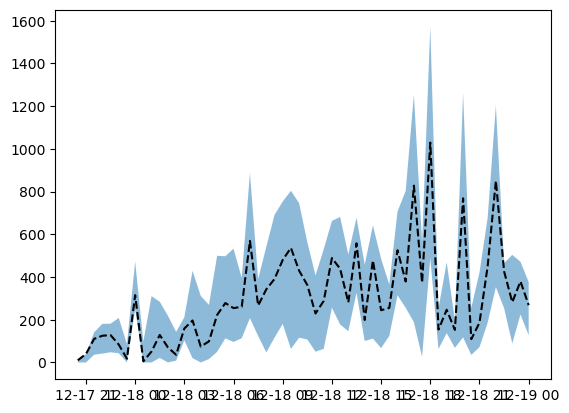

In [5]:
'''
fig, axs = plt.subplots(3,3)

im0 = axs[0,0].plot(wrf_time[spin_up:end],lwpCNT_list[0],color='black', linewidth = 2)
im1 = axs[0,1].plot(wrf_time[spin_up:end],lwpCNT_list[1],color='black', linewidth = 2)
im2 = axs[0,2].plot(wrf_time[spin_up:end],lwpCNT_list[2],color='black', linewidth = 2)
im3 = axs[1,0].plot(wrf_time[spin_up:end],lwpCNT_list[3],color='black', linewidth = 2)
im4 = axs[1,1].plot(wrf_time[spin_up:end],lwpCNT_list[4],color='black', linewidth = 2)
im5 = axs[1,2].plot(wrf_time[spin_up:end],lwpCNT_list[5],color='black', linewidth = 2)
im6 = axs[2,0].plot(wrf_time[spin_up:end],lwpCNT_list[6],color='black', linewidth = 2)
im7 = axs[2,1].plot(wrf_time[spin_up:end],lwpCNT_list[7],color='black', linewidth = 2)
im8 = axs[2,2].plot(wrf_time[spin_up:end],lwpCNT_list[8],color='black', linewidth = 2)

fig.autofmt_xdate()

axs[0,0].xaxis.set_ticks(wrf_time[::10])
axs[0,1].xaxis.set_ticks(wrf_time[::10])
axs[0,2].xaxis.set_ticks(wrf_time[::10])
axs[1,0].xaxis.set_ticks(wrf_time[::10])
axs[1,1].xaxis.set_ticks(wrf_time[::10])
axs[1,2].xaxis.set_ticks(wrf_time[::10])
axs[2,0].xaxis.set_ticks(wrf_time[::10])
axs[2,1].xaxis.set_ticks(wrf_time[::10])
axs[2,2].xaxis.set_ticks(wrf_time[::10])

for ax in axs.flatten():
    ax.set_xlim(wrf_time[spin_up], wrf_time[end-1])

for i in range(len(lwpCNT_list)):
    plt.plot(wrf_time[spin_up:end], lwpCNT_list[i])

'''
# prendre min et max

lwpCNT_arr = np.array(lwpCNT_list)

y_min = np.min(lwpCNT_arr, axis=0)
y_max = np.max(lwpCNT_arr, axis=0)

plt.fill_between(wrf_time[spin_up:end], y_min, y_max ,alpha= 0.5)
plt.plot(wrf_time[spin_up:end],lwpCNT_list[0], 'k--')